In [1]:
#!/usr/bin/env python
# example of proof-of-work algorithm

import hashlib
import time

try:
    long        # Python 2
    xrange
except NameError:
    long = int  # Python 3
    xrange = range
# b. Change nonce size from 32 bits to 64 bits 
max_nonce = 2 ** 64  # 4 billion
# c. Declare two list variables including: list_avg_elapsted_time and list_avg_hash_power.
list_avg_elapsed_time = []  
list_avg_hash_power = [] 

def proof_of_work(header, difficulty_bits):
    # calculate the difficulty target
    # a. Replace hash algorithm from SHA256 to SHA512
    target = 2 ** (512 - difficulty_bits)

    for nonce in xrange(max_nonce):
        hash_result = hashlib.sha512((str(header) + str(nonce)).encode()).hexdigest()

        # check if this is a valid result, equal to or below the target
        # long(number, base of number)
        if long(hash_result, 16) <= target:
            print("Success with nonce %d" % nonce)
            print("Hash is %s" % hash_result)
            return (hash_result, nonce)

    print("Failed after %d (max_nonce) tries" % nonce)
    return nonce

if __name__ == '__main__':

    nonce = 0
    hash_output = ''  # initialize hash_result as an empty string

    # d. Modify for-loop to use difficulty_bits ranging from 0 to 20 (i.e., for difficulty_bits in xrange(21):).
    for difficulty_bits in xrange(21): 

        list_elapsed_time = []  
        list_hash_power = []  
        # e. Create an inner for-loop to iterate 20 times to calculate the average elapsed time and hash power for each difficulty_bits value.
        for i in range(20):
            print(i)  
            difficulty = 2 ** difficulty_bits
            print("Difficulty: %ld (%d bits)" % (difficulty, difficulty_bits))
            print("Starting search...")

            # checkpoint the current time
            begin_time = time.time()

            # make a new block which includes the hash from the previous block
            # we fake a block of transactions - just a string
            new_block = 'test block with transactions' + hash_output

            # find a valid nonce for the new block
            (hash_output, nonce) = proof_of_work(new_block, difficulty_bits)

            # checkpoint how long it took to find a result
            final_time = time.time()

            elapsed_time = final_time - begin_time
            list_elapsed_time.append(elapsed_time)  

            print("Elapsed Time: %.4f seconds" % elapsed_time)

            if elapsed_time > 0:

                # estimate the hashes per second
                hash_power = float(long(nonce) / elapsed_time)
                list_hash_power.append(hash_power)  

                print("Hashing Power: %ld hashes per second" % hash_power)
                print("==========================================================")
        
        # f. After exiting from the inner loop, print average elapsed time and hash power for the current difficulty_bits value. 
        # Append average elapsed time and average hash power for the current difficulty_bits value to list_avg_elapsed_time and list_avg_hash_power lists

        avg_elapsed_time = sum(list_elapsed_time) / len(list_elapsed_time)
        avg_hash_power = sum(list_hash_power) / len(list_hash_power)

        list_avg_elapsed_time.append(avg_elapsed_time)  
        list_avg_hash_power.append(avg_hash_power)  
        print("Average elapsed time: %.4f seconds" % avg_elapsed_time)
        print("Average Hash power: %.2f hashes per second" % avg_hash_power)

0
Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is 8256bd139f66fb0461ab0c981c9d5b122841d6e1e4dd1c0543ab653c46519c6eabf072f0deaad751969670836a6f06f58115973971d6cc24ca43f7f84458d8bf
Elapsed Time: 0.0001 seconds
Hashing Power: 0 hashes per second
1
Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is 57f7ac73fb8f8c65240b1cc320c5cab79036305022232dd44ac7f6753ce68b42f6de1cc83a6b7aae2d98bd0809c853821c31ec61801db2655195b099541ddbd8
Elapsed Time: 0.0001 seconds
Hashing Power: 0 hashes per second
2
Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is 409e312207479901df36a7110e53d429b891e43b329c9925d0a733b4731155ad778a5d881e0e11cadbc027f0968d5288dc93ed69cc56488f2000247835f576da
Elapsed Time: 0.0001 seconds
Hashing Power: 0 hashes per second
3
Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is 6f6aea3b242455c98bae59e36e3df910dfd590e2a31d483804a95197dd8ce29e82c0b95856c76ee6b6325b8287c354604e066ae583d835113338c8bc5a3e0518


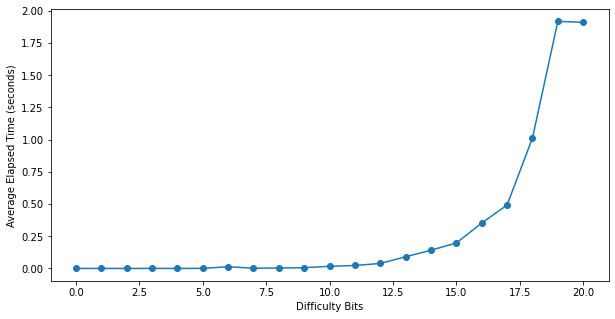

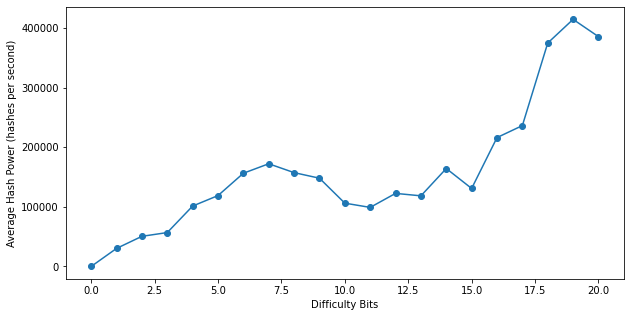

In [14]:
# g. Start a new code cell to create a plot of list_average_elapsed_time and a plot of list_avg_hash_power as functions of difficulty_bits ranging from 0 to 20 using matplotlib 
# plotting library. You may need to review a tutorial available at 
# https://howtothink.readthedocs.io/en/latest/PvL_H.html

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1) = plt.subplots(1, figsize=(10, 5))

# Plot the data on the first subplot
ax1.plot(range(21), list_avg_elapsed_time, marker='o')
ax1.set_xlabel('Difficulty Bits')
ax1.set_ylabel('Average Elapsed Time (seconds)')
plt.show()

# Plot the data on the second subplot
fig, (ax2) = plt.subplots(1, figsize=(10, 5))
ax2.plot(range(21), list_avg_hash_power, marker='o')
ax2.set_xlabel('Difficulty Bits')
ax2.set_ylabel('Average Hash Power (hashes per second)')
plt.show()